In [1]:
import pandas as pd
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [1]:
import numpy as np
from audiolm_pytorch import SoundStream, SoundStreamTrainer

soundstream = SoundStream(
    codebook_size = 1024,
    rq_num_quantizers = 8,
)
soundstream.load("content/soundstream/results3/soundstream.9000.pt")

trainer = SoundStreamTrainer(
    soundstream,
    folder = '/home/ckwdani/Music/train-clean-100',
    batch_size = 4,
    grad_accum_every = 8,         # effective batch size of 32
    data_max_length = 320 * 32,
    num_train_steps = 20,
    save_model_every=10,
    results_folder = './content/soundstream/results2',
).cuda()

trainer.train()



2023-01-16 17:02:00 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-01-16 17:02:00.183360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 17:02:00.731543: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-16 17:02:00.731591: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-16 17:02:00.731596: W tensorflow/compiler/tf

RuntimeError: Error(s) in loading state_dict for SoundStream:
	Missing key(s) in state_dict: "stft_discriminator.stft.window". 
	Unexpected key(s) in state_dict: "stft_discriminator.layers.0.1.b", "stft_discriminator.layers.1.1.b", "stft_discriminator.layers.2.1.b", "stft_discriminator.layers.3.1.b", "stft_discriminator.layers.4.1.b", "stft_discriminator.layers.5.1.b". 
	size mismatch for stft_discriminator.init_conv.weight: copying a param with shape torch.Size([32, 1, 7, 7]) from checkpoint, the shape in current model is torch.Size([32, 2, 7, 7]).

In [13]:
range(1)[1]

IndexError: range object index out of range

In [7]:
#freeze soundstream parameters
for param in soundstream.parameters():
    param.requires_grad = False

In [5]:
from audiolm_pytorch import SoundStream, SoundStreamTrainer
soundstream = SoundStream(
    codebook_size = 1024,
    rq_num_quantizers = 8,
   attn_window_size = 256,       # local attention receptive field at bottleneck
    attn_depth = 2
    #    attn_window_size = 128,       # local attention receptive field at bottleneck
    #attn_depth = 2,
    #target_sample_hz=16000
    #target_sample_hz=16000
)
#/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks/content/00_Soundstream_new/2_libri_15000
#/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks/content/soundstream/resultsSS__NEWEXTRA3
#soundstream.load("content/soundstream/before_0.3/resultsSS_extra6/soundstream.32390.pt")
device = "cuda"

soundstream.to(device)
soundstream.load("content/soundstream/verision0.12.1/00_10000_1e-4_bs6_gae8_dml320-32/soundstream.42500.pt")


# soundstream = SoundStream(
#
#     codebook_size = 2048,
#     rq_num_quantizers = 8,
#     attn_window_size = 256,       # local attention receptive field at bottleneck
#     attn_depth = 6,
#     target_sample_hz=16000
# )
#soundstream.load("content/soundstream/verision0.11.19_higher_field/02_new_60000_1e-5_bs4_gae12_dml320-32_test_attnD-6/soundstream.3000.pt")
#soundstream.load("content/soundstream/verision0.11.19_higher_field/02_new_60000_1e-5_bs4_gae12_dml320-32_test_attnD-6/soundstream.3000.pt")


#soundstream.load("content/soundstream/vers0.7.4/01_Soundstream_7_x_new_libri_full/3_23000/soundstream.11500.pt")

for param in soundstream.parameters():
    param.requires_grad = False

In [6]:

from torch import nn
from audiolm_pytorch.data import SoundDataset
import torchaudio
import numpy as np
from torchvision.transforms import InterpolationMode
import torchvision





test = torchaudio.load("/home/ckwdani/Music/libri/libri_clean/train-clean-100/40/222/40-222-0000.flac")
testCafe = torchaudio.load("/home/ckwdani/Music/emotionDatasets/converted/cafe/Joie/Fort/01-J-2-1.flac")
testTess = torchaudio.load("/home/ckwdani/Music/emotionDatasets/converted/tess/OAF_happy/OAF_beg_happy.flac")
#test = torchaudio.load("/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/Stimuli_Intensitätsmorphs/nf01_ang_w02_o_100_70dB.wav")

#print(testTess[0][0].shape)
#paddboth = int((48000-testTess[0][0].shape[0])/2)
#testerPad = nn.functional.pad(testTess[0], (paddboth,paddboth), value=-0.0)
#resizer = torchvision.transforms.Resize((1, 48000), interpolation=InterpolationMode.BILINEAR,)
#print(resizer(testTess[0]))

import torch
with torch.no_grad():

    #testTensor = soundstream.encoder(test[0].to("cpu"))
    #testForward = soundstream(test[0].to("cpu"), return_recons_only = True)
    testForward = soundstream(test[0].to(device), return_encoded = True)
    #testerPadForward = soundstream(testerPad.to("cpu"), return_encoded = True)
    tessTestForward = soundstream(testTess[0].to(device), return_encoded = True) #return_recons_only=True
    #                        )
    testCafeForward = soundstream(testCafe[0].to(device), return_encoded=True)
    print(soundstream(test[0].to(device),))

#print(testForward[0][0].shape)


tensor(6720.0605, device='cuda:0')


In [8]:
from IPython.lib.display import Audio
import numpy as np
from torchvision.transforms import InterpolationMode
import torchvision



# resizer = torchvision.transforms.Resize((512, 600), interpolation=InterpolationMode.BILINEAR,)
# resizer2 = torchvision.transforms.Resize((600, 8), interpolation=InterpolationMode.BILINEAR,)
# testResize = resizer(tessTestForward[0])
# testResize2 = resizer2(tessTestForward[1]).detach().numpy()
#newTensor = torch.tensor([testResize, testResize2])

#Audio(testCafe[0], rate=48000)
#Audio(soundstream.decoder(tessTestForward[0]).detach().cpu().numpy()[0,0,:], rate=16000)
Audio(soundstream.decoder(testForward[0]).detach().cpu().numpy()[0,0,:], rate=16000)
#Audio(soundstream.decoder(testCafeForward[0]).detach().cpu().numpy()[0,0,:], rate=16000)
#Audio(testForward[0,0,:], rate=16000)
#Audio(test[0].cpu().numpy(), rate=16000)
#Audio(soundstream.decoder(testResize).detach().cpu().numpy()[0,0,:], rate=16000)
#Audio(soundstream.decoder(testerPadForward[0]).detach().cpu().numpy()[0,0,:], rate=16000)
#Audio(soundstream.decoder(testTensor.unsqueeze(0)).detach().cpu().numpy()[0,0,:], rate=16000)
#Audio(test[0].numpy(), rate=16000)

#Audio(test[0], rate=test[1])
#soundstream.decoder(testTensor).detach().cpu().numpy()[0,0,:]



#testForward[0].cpu().numpy()[0]
#soundstream.decoder(testForward[0]).detach().cpu().numpy()[0,0,:]
#testTensor.cpu().numpy()
#testForward[0].cpu().numpy()[0]

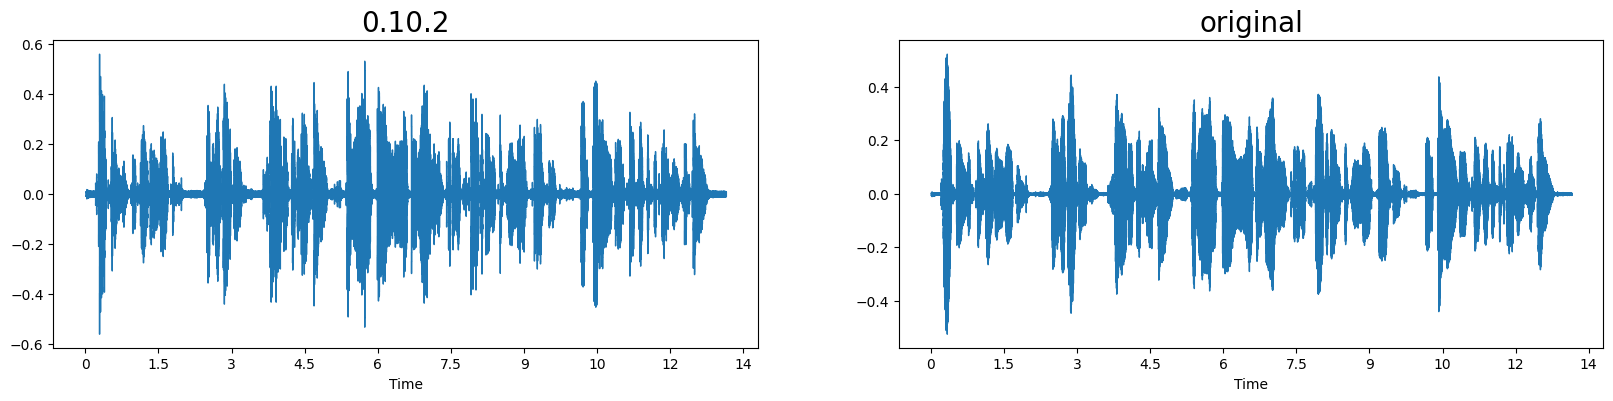

In [4]:
import sys
from pathlib import Path
import importlib
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU
importlib.reload(exU)

#exU.waveplot(soundstream.decoder(testTensor).detach().cpu().numpy(), sr=22050, emotion="test")
#exU.waveplot_two_datas(soundstream.decoder(testTensor).detach().cpu().numpy(), sr=16000, emotion="test", data1=test[0].numpy(), sr1=16000, emotion1="test")
exU.waveplot_two_datas(soundstream.decoder(testForward[0]).detach().cpu().numpy()[0,0,:], sr=16000, emotion="0.10.2", data1=test[0].numpy(), sr1=16000, emotion1="original")
#exU.waveplot_two_datas(testForward[0,0,:].numpy(), sr=16000, emotion="0.10.2", data1=test[0].numpy(), sr1=16000, emotion1="original")
#exU.waveplot_two_datas(soundstream.decoder(testCafeForward[0]).detach().cpu().numpy()[0,0,:], sr=16000, emotion="0.7.3", data1=testCafe[0].numpy(), sr1=16000, emotion1="original")

In [2]:
import sys
from pathlib import Path
import importlib
module_path = str(Path.cwd().parents[0] / "network_models/soundstream_lstm")
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = str(Path.cwd().parents[0] / "network_models/soundstream_models_and_utils")
if module_path not in sys.path:
    sys.path.append(module_path)

import network_models.soundstream_lstm.CombinedEmoDataset_7_Emo as ced


importlib.reload(ced)

def getMinMaxFromValues(ds):
    mini, maxi = float("inf"), 0
    print(len(ds))

    mini = min(ds)
    maxi = max(ds)
    return mini, maxi


collator = ced.collateToSeconds(3.5, 16000, 0, True)
directory_tess="/home/ckwdani/Music/emotionDatasets/converted_mono/tess"
tess = ced.CombinedEmoDataSet_7_emos(directory_tess=directory_tess, device="cpu",  transFormAudio=collator)
allEmos = ced.CombinedEmoDataSet_7_emos(directory_tess=directory_tess,
                                            directory_cafe="/home/ckwdani/Music/emotionDatasets/converted_mono/cafe",
                                            directory_ravdess="/home/ckwdani/Music/emotionDatasets/converted_mono/RAVDESS Audio_Speech_Actors_01-24",
                                            directory_mesd="/home/ckwdani/Music/emotionDatasets/converted_mono/mesd",
                                            filter_emotions=["neutral", "surprise"],

                                     device="cpu",  transFormAudio=collator)
#tesspad = (soundstream(tess[6][0], return_encoded= True))


# arr = (soundstream(tess[0][0], return_encoded= True)[0]).detach().numpy().flatten()
# for i in range(len(tess)//8):
#     print(i)
#     arr = np.append(arr, (soundstream(tess[i][0], return_encoded= True)[0]).detach().numpy().flatten())
#
#
#
# print("generated")



In [11]:
from network_models.soundsream_models_and_utils.ss_model_flat import SSFlatModel
from network_models.soundsream_models_and_utils.ss_model_conv import SSConvModel3Sec
import network_models.soundsream_models_and_utils.ss_model_dim_red as ssmdr
import network_models.soundsream_models_and_utils as smu
#importlib.reload(ssmdr)

model = SSFlatModel(num_emotions = 7).cpu()
# model(testForward[0][0], return_with_dims = True, soft_max=True)
print(model.parameters)

<bound method Module.parameters of SSFlatModel(
  (base_linear1): Linear(in_features=300, out_features=100, bias=True)
  (base_linear2): Linear(in_features=100, out_features=4, bias=True)
  (base_linear3): Linear(in_features=4, out_features=4, bias=True)
  (base_linear4): Linear(in_features=4, out_features=7, bias=True)
  (dropouts): Dropout(p=0.2, inplace=False)
  (linear1): Linear(in_features=89600, out_features=3000, bias=True)
  (linear2): Linear(in_features=3000, out_features=300, bias=True)
)>


In [31]:
acc_in = 0.1112
f"_acc_{acc_in*100:.0f}"

'_acc_11'

In [16]:
module_path = str(Path.cwd().parents[0] / "network_models/soundstream_lstm")
if module_path not in sys.path:
    sys.path.append(module_path)
import network_models.soundstream_lstm.convModel as convM
importlib.reload(convM)

model = convM.SSConvModel3Sec(512, 175)
model(torch.unsqueeze(tesspad[0], dim=0), False)[0]
#model.parameters

/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/venv/lib/python3.10/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/network_models/soundstream_lstm/convModel.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y = softmax(y)


tensor([0.1911, 0.0921, 0.0953, 0.1287, 0.2017, 0.1713, 0.1200],
       grad_fn=<SelectBackward0>)

In [ ]:
# module_path = str(Path.cwd().parents[0] / "network_models/w2v_emotion_model")
# if module_path not in sys.path:
#     sys.path.append(module_path)
# import network_models.w2v_emotion_model.custom_model as cusM

In [40]:
import numpy
import torch.nn.functional as F
ksize = 5
sizea = 512
sizeb = 175
enda = (((sizea  - np.floor(ksize/2) * 2)/2) - (np.floor(ksize/2)*2))/2
endb = (((sizeb  - np.floor(ksize/2) * 2)/2) - (np.floor(ksize/2)*2))/2
# print(enda)
# print(endb)
# tt = tesspad[0][:, 0:sizea, 0:sizeb].numpy()
# #tt =tesspad[0]
# print(tt.shape)
# print(torch.unsqueeze(tesspad[0], dim=0).shape, "sa")
# ttt = torch.Tensor(numpy.array([tt]))

ttt = torch.unsqueeze(tesspad[0], dim=0)
#ttt= tesspad[0]
#print(testerPadForward[0][:, 0:32, 0:32])
conv1 = nn.Conv2d(1, 6, ksize)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, ksize)
fc1 = nn.Linear(16 * int(enda) * int(endb), 120)

x = pool(F.relu(conv1(ttt)))
print(x.shape)
x = pool(F.relu(conv2(x)))
x = torch.flatten(x, 1) # flatten all dimensions except batch
x = F.relu(fc1(x))
print(x)

torch.Size([1, 6, 254, 85])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0152, 0.3259, 0.2884, 0.0000, 0.0000, 0.3170, 0.1468, 0.0000, 0.0000,
         0.0000, 0.0319, 0.0441, 0.4582, 0.6633, 0.7453, 0.0000, 0.1988, 0.1530,
         0.0117, 0.9120, 0.6072, 0.1202, 0.0000, 0.1016, 0.0000, 0.0000, 0.5893,
         0.5405, 0.0000, 0.0000, 0.1079, 0.1084, 0.0000, 0.0000, 0.0000, 0.5542,
         0.0000, 0.0000, 0.3057, 0.0000, 0.0000, 0.0934, 0.0881, 0.0000, 0.0616,
         0.3607, 0.0000, 0.4659, 0.0000, 0.5376, 0.0000, 0.0000, 0.0000, 0.4656,
         0.3650, 0.5341, 0.0000, 0.0000, 0.9378, 0.8720, 0.0000, 0.2429, 0.0000,
         0.2991, 0.4383, 0.0000, 0.0000, 0.1063, 0.0000, 0.2275, 0.3307, 0.0000,
         0.0000, 0.4532, 0.0000, 0.5019, 0.0000, 0.0000, 0.6307, 0.1206, 0.2016,
         0.8076, 0.0000, 0.2088, 0.0000, 0.3019, 0.0000, 0.1120, 0.0000, 0.0000,
         0.5587, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0369, 0.0000,


2.011625
13.145


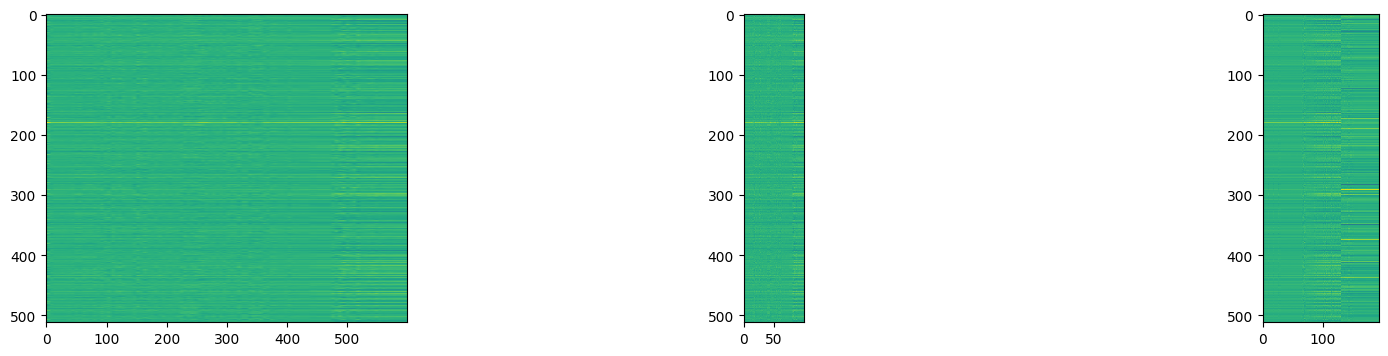

In [6]:
from torchvision.transforms import InterpolationMode
import torchvision
from matplotlib import pyplot as plt
print(testTess[0].shape[1] / 16000)
print(test[0].shape[1] / 16000)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
resizer = torchvision.transforms.Resize((512, 600), interpolation=InterpolationMode.BILINEAR,)
testResize = resizer(tessTestForward[0])
ax[0].imshow((testResize[0] + 30)/60, interpolation="nearest")
ax[1].imshow((tessTestForward[0][0].detach().numpy() + 30)/60, interpolation="nearest")
ax[2].imshow(testCafeForward[0][0].detach().numpy(), interpolation="nearest")
plt.show()

In [ ]:
%%capture
%env CUDA_VISIBLE_DEVICES=""

In [ ]:

from utils.audio_dataset_utils import train_val_dataset
from network_models.soundstream_lstm.CombinedEmoDataset_7_Emo import CombinedEmoDataSet_7_emos
import network_models.soundsream_models_and_utils.ss_encoded_dataset as ssed
#from ssed import ss_encoded_dataset_full, ss_encoded_dataset
from audiolm_pytorch import SoundStream, SoundStreamTrainer

dataset = ssed.ss_encoded_dataset_full(
                                            directory_tess="/home/ckwdani/Music/emotionDatasets/converted_mono/tess",
                                            directory_cafe="/home/ckwdani/Music/emotionDatasets/converted_mono/cafe",
                                            directory_ravdess="/home/ckwdani/Music/emotionDatasets/converted_mono/RAVDESS Audio_Speech_Actors_01-24",
                                            directory_mesd="/home/ckwdani/Music/emotionDatasets/converted_mono/mesd",
                                            device="cuda", sound_stream_path="content/soundstream/vers0.7.4/01_Soundstream_7_x_new_libri_full/5_3250/soundstream.3250.pt")
dataset.saveEncoding("content/data/allEncodings.pkl")
# datasetSl = CombinedEmoDataSet_7_emos(directory_tess="/home/ckwdani/Music/emotionDatasets/converted_mono/tess/OAF_disgust", device="cpu")
#
#
# soundstream = SoundStream(
#     codebook_size = 1024,
#     rq_num_quantizers = 8,
#     #target_sample_hz=16000
# )
# soundstream.to("cpu")
# soundstream.load("content/soundstream/vers0.7.4/01_Soundstream_7_x_new_libri_full/5_3250/soundstream.3250.pt")
#
#
# datasetenc = ss_encoded_dataset(data_set=datasetSl, sound_stream=soundstream, device="cpu")
#datasetenc.saveEncoding("content/data/allEncodings.csv")

2023-02-02 16:41:00 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-02-02 16:41:00.148039: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 16:41:00.672565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-02 16:41:00.672626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-02 16:41:00.672631: W tensorflow/compiler/tf

In [1]:
import sys
from pathlib import Path
import gc

module_path = str(Path.cwd().parents[0] / "network_models/soundstream_models_and_utils")
if module_path not in sys.path:
    sys.path.append(module_path)
import network_models.soundsream_models_and_utils.ss_encoded_dataset as ssed
import importlib
importlib.reload(ssed)

2023-02-08 15:16:35 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-02-08 15:16:35.487928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 15:16:35.990762: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-08 15:16:35.990817: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-08 15:16:35.990821: W tensorflow/compiler/tf

<module 'network_models.soundsream_models_and_utils.ss_encoded_dataset' from '/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/network_models/soundsream_models_and_utils/ss_encoded_dataset.py'>

In [7]:
gc.collect()
testerererer= ssed.ss_encoded_dataset_full(csvPath="content/data/allEncodings.pkl", device="cuda")
print(testerererer.encoded_dataset.label_list)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [92]:

#dataset.saveEncoding("content/data/allEncodings.pkl")
#datasetenc.encodedData.to_csv("content/data/allEncodings.csv", index=False)
#dataset.encoded_dataset.encodedData.to_pickle("content/data/allEncodings.pkl")

327

In [12]:
a = [1,2,3,4,5,6]
a[2:6]

[3, 4, 5, 6]

In [24]:
import pandas as pd
import numpy as np
import torch
print(testerererer[0])
#print(dataset.encoded_dataset.encodedData.iloc[0])

/home/ckwdani/.local/share/JetBrains/Toolbox/apps/PyCharm-P/ch-0/222.4345.23/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
/home/ckwdani/.local/share/JetBrains/Toolbox/apps/PyCharm-P/ch-0/222.4345.23/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
/home/ckwdani/.local/share/JetBrains/Toolbox/apps/PyCharm-P/ch-0/222.4345.23/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
/home/ckwdani/.local/share/JetBrains/Toolbox/apps/PyCharm-P/ch-0/222.4345.23/plugins/python/helpers/pydev/_pydevd_bundle/pydevd_utils.py:606: FutureWarning: iteritems is deprecated and wi

KeyboardInterrupt: 

In [44]:
print(testerererer[0])
print(dataset[0])

(tensor([[[ 0.2403, -2.1115, -0.3542,  ..., -8.4971, -8.3996, -8.4200],
         [ 2.6134,  1.2119,  0.5588,  ...,  1.7748,  1.7210,  1.7229],
         [ 2.7939,  1.5071,  2.1296,  ...,  3.0027,  2.9513,  2.9162],
         ...,
         [-1.1949, -1.1569, -0.9926,  ..., -2.0191, -1.9330, -1.9353],
         [-2.7130, -0.6476, -0.9760,  ..., -0.2312, -0.2261, -0.2240],
         [ 0.6085,  1.5183,  0.6147,  ...,  0.9536,  0.9364,  0.9955]]]), array([[0., 0., 1., 0., 0., 0., 0.]]))
(tensor([[[ 0.2403, -2.1115, -0.3542,  ..., -8.4971, -8.3996, -8.4200],
         [ 2.6134,  1.2119,  0.5588,  ...,  1.7748,  1.7210,  1.7229],
         [ 2.7939,  1.5071,  2.1296,  ...,  3.0027,  2.9513,  2.9162],
         ...,
         [-1.1949, -1.1569, -0.9926,  ..., -2.0191, -1.9330, -1.9353],
         [-2.7130, -0.6476, -0.9760,  ..., -0.2312, -0.2261, -0.2240],
         [ 0.6085,  1.5183,  0.6147,  ...,  0.9536,  0.9364,  0.9955]]]), array([[0., 0., 1., 0., 0., 0., 0.]]))


In [39]:
import torch
with torch.no_grad():
    output = soundstream.encoder(test[0].to("cuda"))
nump = output.cpu().numpy()
numpMena = nump.mean(1)
# numpMena.shape = 1,512
import sklearn.decomposition as sk
pca = sk.PCA(n_components=3)

pca.fit_transform(nump.T - nump.T.mean())

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

## Loading dataset ##

In [9]:
 #Loading the created dataset using datasets
from datasets import load_dataset, load_metric


data_files = {
    "train": "train.csv",
    "validation": "test.csv",
    "testPersonal": "testPersonal.csv"

}

dataset = load_dataset("content/data/", data_files=data_files, delimiter="\t", )
train_dataset = dataset["train"]
eval_dataset = dataset["validation"]
testPersonal_dataset = dataset["testPersonal"]

# We need to specify the input and output column
input_column = "path"
output_column = "emotion"
# we need to distinguish the unique labels in our SER dataset
label_list = train_dataset.unique(output_column)
label_list.sort()  # Let's sort it for determinism
num_labels = len(label_list)
#print(f"A classification problem with {num_labels} classes: {label_list}")

2023-01-04 13:48:09 | WARNING | datasets.builder | Using custom data configuration data-5f9e506447fa6370
2023-01-04 13:48:09 | WARNING | datasets.builder | Found cached dataset csv (/home/ckwdani/.cache/huggingface/datasets/csv/data-5f9e506447fa6370/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/3 [00:00<?, ?it/s]

## Preprocessing data with soundstream ##

In [11]:
import utils.audio_dataset_utils as audioUtils
import torchaudio
import pyarrow as pa
import numpy as np

def preprocess_function(example):

    speech = torchaudio.load(example[input_column])[0].to("cuda")
    target = audioUtils.label_to_id(example[output_column], label_list)

    audio_encoded = soundstream.encoder(speech).cpu().detach().numpy()
    audio_1d = pa.array([audio_encoded.flatten()])
    labels = pa.array([target])
    path = pa.array([example[input_column]])
    names = [input_column ,"audio", "labels"]

    result = pa.Table.from_arrays([path, audio_1d, labels], names=names)

    #result = soundstream.encoder(speech).cpu().detach().numpy()
    #result["labels"] = target
    return result


In [12]:
train_dataset = train_dataset.map(
    preprocess_function,
    num_proc=1
)

eval_dataset = eval_dataset.map(
    preprocess_function,
    num_proc=1
)

2023-01-04 12:41:42 | WARNING | datasets.arrow_dataset | Loading cached processed dataset at /home/ckwdani/.cache/huggingface/datasets/csv/data-5f9e506447fa6370/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317/cache-e9cf89ac3ff0b3e8.arrow
2023-01-04 12:41:43 | WARNING | datasets.arrow_dataset | Loading cached processed dataset at /home/ckwdani/.cache/huggingface/datasets/csv/data-5f9e506447fa6370/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317/cache-22c82ca8dddfd685.arrow


In [13]:
train_dataset[0]["audio"]

[0.30638760328292847,
 -0.30510470271110535,
 -0.33041197061538696,
 -0.2907174229621887,
 -0.3562255799770355,
 0.29445400834083557,
 -0.1566108763217926,
 -0.013954618945717812,
 0.20529910922050476,
 -0.27934232354164124,
 0.46071091294288635,
 -0.1593111753463745,
 -0.28406962752342224,
 -0.7017614841461182,
 4.427418231964111,
 4.227181911468506,
 6.26907205581665,
 3.013918876647949,
 0.8764342069625854,
 0.4706113636493683,
 -2.3540198802948,
 1.8373867273330688,
 0.6554034352302551,
 -2.4241299629211426,
 -5.201148509979248,
 -1.7195477485656738,
 0.6305285096168518,
 -1.0125614404678345,
 -0.6431014537811279,
 -0.7181299924850464,
 0.6639125347137451,
 -0.08849243819713593,
 4.775681018829346,
 2.1517083644866943,
 -3.295724391937256,
 3.406432628631592,
 -4.095615863800049,
 3.162663698196411,
 -2.231292724609375,
 3.5209290981292725,
 -0.4133601486682892,
 -0.1339941918849945,
 -0.12384411692619324,
 -0.31169384717941284,
 -0.1335468739271164,
 0.7801569104194641,
 1.2892788

In [14]:
import numpy as np
a = np.array([[0, 1, 2, 3],[4,5,6,7],[9,10,11,12], [13,14,15,16],[17,18,19,20]])
a[:][1:5]

array([[ 4,  5,  6,  7],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [10]:
from IPython.lib.display import Audio
import torch

unshaped =train_dataset[0]["audio"]
shaped = np.reshape(unshaped, (512, -1))
Audio(soundstream.decoder(torch.Tensor(shaped).to("cuda")).cpu().detach(), rate=16000)

KeyError: 'audio'

In [11]:
import utils.audio_dataset_utils as audioUtils
import torchaudio

trainList=[]
labelList=[]

for example in train_dataset:
    speech = torchaudio.load(example[input_column])[0].to("cuda")
    trainList.append(soundstream.encoder(speech).cpu().detach().numpy())
    labelList.append(audioUtils.label_to_id(example[output_column], label_list))
trainList

[array([[ 0.3063876 , -0.3051047 , -0.33041197, ..., -0.08234769,
         -0.06548929, -0.04923954],
        [-0.40830952, -0.08928604,  0.02311837, ..., -0.13858025,
         -0.17554885, -0.15426645],
        [ 0.08498046,  0.26603556, -0.05119919, ..., -0.17769513,
         -0.15309277, -0.21012864],
        ...,
        [-0.3203127 ,  0.30068865,  0.53593117, ...,  0.2162215 ,
          0.22546041,  0.20146024],
        [ 0.02693148, -0.08334566, -0.01004564, ..., -0.25506097,
         -0.27970195, -0.3014522 ],
        [-0.07455716, -0.16043043, -0.24871989, ..., -0.0863315 ,
         -0.07316703, -0.05220665]], dtype=float32),
 array([[ 0.30637044, -0.31880808, -0.33953336, ..., -0.06603552,
         -0.06749448, -0.07403287],
        [-0.40832615, -0.06253474, -0.0054084 , ..., -0.15713125,
         -0.1607995 , -0.15691672],
        [ 0.0849805 ,  0.26155242, -0.01608033, ..., -0.17956439,
         -0.19376016, -0.16338073],
        ...,
        [-0.32028994,  0.27833542,  0.3

## LSTM ##

In [12]:
import network_models.soundstream_lstm.lstm_model as soundStreamLSTM

num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 512 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes

lstm1 = soundStreamLSTM.LSTM1(num_classes, input_size, hidden_size, num_layers, testTensor[:, 0].shape) #lstm class

In [13]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [41]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(train_dataset)
      #X_train_tensors_final)
      # #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0

  # obtain the loss function
  loss = criterion(outputs, eval_dataset)
                   #y_train_tensors)

  loss.backward() #calculates the loss of the loss function

  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

AttributeError: 'Dataset' object has no attribute 'size'

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, Activation, MaxPooling1D


def create_new_model(layer):
    model = Sequential([
        LSTM(123, return_sequences=False, input_shape=(layer)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(6, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [43]:
layer = 512
model = create_new_model(layer=layer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 1,087,782
Trainable params: 1,087,782
No

In [38]:
y_train_list = [np.array([x]) for x in labelList]

In [39]:
y_train_list

[array([2]),
 array([4]),
 array([0]),
 array([0]),
 array([1]),
 array([5]),
 array([3]),
 array([0]),
 array([3]),
 array([4]),
 array([4]),
 array([5]),
 array([5]),
 array([3]),
 array([5]),
 array([5]),
 array([1]),
 array([5]),
 array([1]),
 array([3]),
 array([5]),
 array([5]),
 array([5]),
 array([1]),
 array([0]),
 array([5]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([2]),
 array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([0]),
 array([2]),
 array([0]),
 array([3]),
 array([3]),
 array([3]),
 array([1]),
 array([2]),
 array([2]),
 array([3]),
 array([3]),
 array([0]),
 array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([0]),
 array([1]),
 array([4]),
 array([3]),
 array([4]),
 array([5]),
 array([5]),
 array([4]),
 array([4]),
 array([2]),
 array([5]),
 array([5]),
 array([2]),
 array([3]),
 array([2]),
 array([2]),
 array([2]),
 array([2]),
 array([3]),
 array([4]),
 array([2]),
 array([5]),
 array([0]),
 array([4]),
 array([4]),
 array([5]),

In [35]:
y_train_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [32]:
x_train = np.expand_dims(trainList, -1)

/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/venv/lib/python3.10/site-packages/numpy/lib/shape_base.py:591: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


ValueError: could not broadcast input array from shape (512,134) into shape (512,)

In [40]:
epochs = 1
history = model.fit(trainList, y_train_list, epochs=epochs)

ValueError: Data cardinality is ambiguous:
  x sizes: 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512
  y sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
Make sure all arrays contain the same number of samples.

In [31]:
module_path = str(Path.cwd().parents[0] / "network_models/soundstream_lstm")
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = str(Path.cwd().parents[0] / "network_models/w2v_emotion_model")
if module_path not in sys.path:
    sys.path.append(module_path)
import utils.wav2Vec_utils as w2vU
import network_models.soundstream_lstm.CombinedEmoDataset_7_Emo as CED
import network_models.soundstream_lstm.LSTM_dataset as lds
importlib.reload(CED)
importlib.reload(lds)
tess_dataset = CED.CombinedEmoDataSet_7_emos(directory_tess="/home/ckwdani/Music/emotionDatasets/converted_mono/tess",
                                             directory_cafe="/home/ckwdani/Music/emotionDatasets/converted_mono/cafe",
                                             directory_ravdess="/home/ckwdani/Music/emotionDatasets/converted_mono/RAVDESS Audio_Speech_Actors_01-24",
                                             directory_mesd="/home/ckwdani/Music/emotionDatasets/converted_mono/mesd",
                                             device="cpu")

In [33]:
processor, sr = w2vU.init_w2v2(num_labels=len(tess_dataset.label_list), label_list=tess_dataset.label_list)
testDS = lds.AudioEmotionTessWav2VecDataset(dataSet=tess_dataset, processor=processor, sampling_rate=sr)